# Aulas 07 e 08 - Aplicando os conceitos estatísticos em uma EDA

## Afinal, o que é uma análise exploratória de dados?

Em uma **Análise Exploratória de Dados** (EDA, *Exploratory Data Analysis*), o objetivo é, como o nome indica, justamente **explorar os dados**. É uma etapa fundamental de todo projeto em Ciência de Dados, pois compreende desde o completo entendimento do problema em questão, ao delineamento de objetivos do projeto e abordagens para buscar padrões iniciais e extração de insights nos dados disponíveis.

Embora uma EDA seja um problema bastante aberto, ela costuma ter algumas etapas essenciais, sumarizadas no diagrama abaixo.

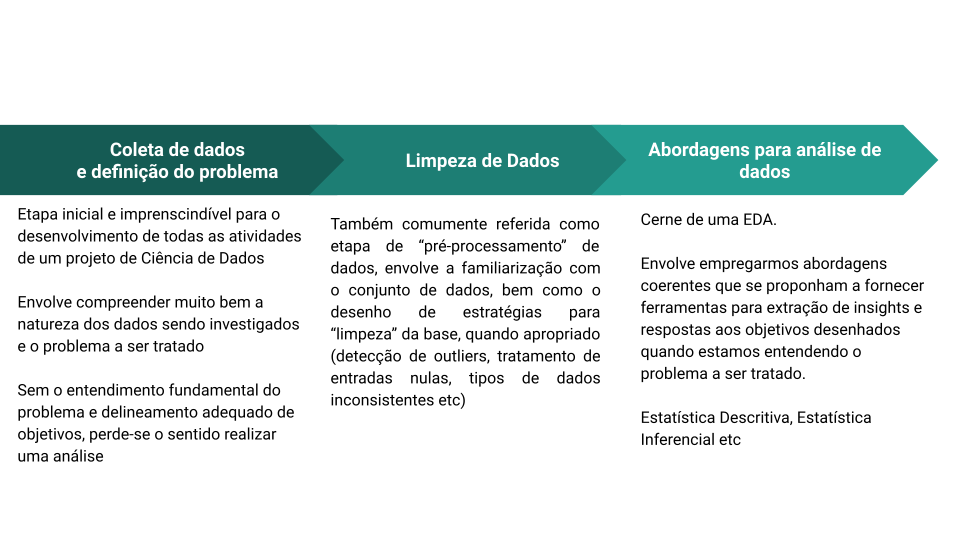

____

## Vamos supor o seguinte case:

Vamos supor que estejamos trabalhando em uma empresa especializada na distribuição e vendas de vinhos tintos. Na óptica da empresa, seria interessante que os vinhos que cheguem aos consumidores sejam percebidos pelo público como bebidas de boa qualidade. Com isto em mente, a empresa realizou uma pesquisa com algumas pessoas voluntárias, catalogando a percepção da qualidade do vinho em uma escala de 0 a 10, e as diferentes características físico-químicas de cada tipo de vinho que poderia ser produzido. As seguintes características foram sistematizadas nesta pesquisa:

- 1 - fixed acidity - medida da acidez devido à presença de ácidos orgânicos de baixa volatilidade (ácido málico, lático, tartárico ou cítrico) no vinho;
- 2 - volatile acidity - medida da acidez devido a ácidos de baixo peso molecular (sobretudo ácido acético) presentes no vinho, que são responsáveis pelo aroma e gosto de vinagre;
- 3 - citric acid - medida de ácido cítrico no vinho;
- 4 - residual sugar - medida de açúcar residual presente no vinho, com origem nos resíduos de açúcar da uva que permanecem no vinho após o fim da fermentação;
- 5 - chlorides - medida de cloretos (íons de cloro) no vinho;
- 6 - free sulfur dioxide - medida de dióxido de enxofre livre (isto é, que não está ligado a outras moléculas) no vinho;
- 7 - total sulfur dioxide - medida de dióxido de enxofre total (livre + porção ligada a outras moléculas) no vinho;
- 8 - density - medida da densidade do vinho;
- 9 - pH - medida do pH do vinho;
- 10 - sulphates - medida de sulfatos (íons SO₄²⁻) no vinho;
- 11 - alcohol - medida da graduação alcoólica do vinho.

Como já mencionamos, a estas características, as pessoas voluntárias associaram uma nota em uma escala de 0 a 10 (que é tida como uma nova coluna na nossa base de dados a ser explorada):

- 12 - quality - score numérico de qualidade (de 0 a 10), produzido com base em dados sensoriais.


A partir da base de dados coletada na pesquisa, nosso objetivo, enquanto Cientistas de Dados, é explorar o dataset para fornecer conclusões que ajudem a impulsionar o negócio da empresa.

**Observação:**
- O contexto deste "case" foi simulado apenas para fins didáticos. A base de dados, e a descrição de seu propósito original, pode ser consultada [aqui](https://archive.ics.uci.edu/ml/datasets/wine+quality).

______

## Começando nossa EDA

Como comentamos anteriormente, os passos inicias de nossa análise envolvem **ingerir os dados** e **formular o problema sobre o qual vamos trabalhar**.

### Que tipos de perguntas seria interessante que tentássemos responder em nossa EDA?

- Correlações das notas com algumas características do dataset
- Como definimos o que é um vinho "bom"?
- Se tivéssemos que enfocar apenas uma característica de interesse, qual seria?

**Atenção:**
- Vale lembrar que uma EDA é um **problema de escopo aberto** e, portanto, uma variedade de abordagens são possíveis, não sendo, assim, as perguntas acima, os únicos caminhos existentes de análise.

### Vamos ler os dados

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("winequality-red.csv")

In [9]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Quais tipos de dados temos na nossa base?

In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Quantas entradas temos na base?

In [11]:
df.shape

(1599, 12)

Vemos assim, que temos as 11 caracterísitcas físico-químicas que mencionamos acima, e mais uma coluna, indicando a nota associada à qualidade daquele vinho. Além disso, temos 1599 observações no nosso conjunto de dados.

Será que temos entradas nulas?

In [12]:
df.isnull()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
0                   False                 False    False  False      False   
1                   False                 False    False  False      False   
2                   False                 False    False  False      False   
3                   False                 False    False  False      False   
4                   False                 False    False  False      False   
...                   ...                   ...      ...    ...        ...   
1594                False                 False    False  False      False   
1595                False                 False    False  False      False   
1596                False                 False    False  False      False   
1597                False                 False    False  False      False   
1598                False                 False    False  False      False   

      alcohol  quality  
0       False    False  
1       False    False  
2       False    False  
3       False    False  
4       False    False  
...       ...      ...  
1594    False    False  
1595    False    False  
1596    False    False  
1597    False    False  
1598    False    False  

[1599 rows x 12 columns]

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Ou seja, **não temos valores nulos na nossa base de dados**. (E se tivéssemos?)

___

## Estatística Descritiva: como podemos sumarizar informações das colunas em nossa base de dados?

Observe que, em nossa base de dados, temos **medições repetidas de várias características** sendo associadas a diferentes notas pelas pessoas voluntárias participantes da pesquisa. Como podemos melhor visualizar como estão **distribuídos** estes valores?

### Histogramas

Para começarmos a explorar os dados, podemos avaliar as distribuições de algumas das nossas variáveis.

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

[**Histogramas com seaborn**](https://seaborn.pydata.org/generated/seaborn.histplot.html)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

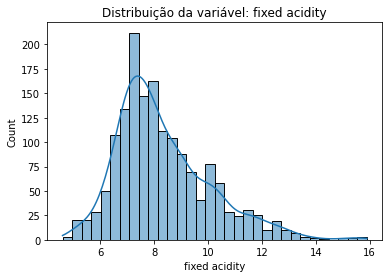

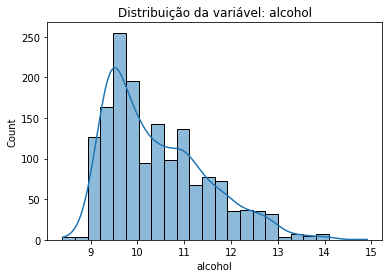

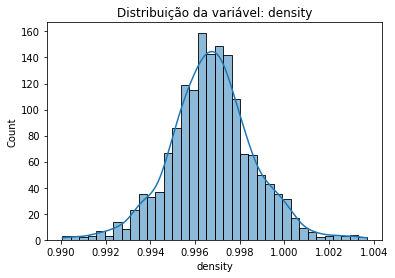

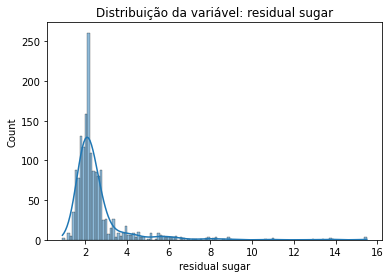

In [15]:
features = ['fixed acidity', 'alcohol', 'density', 'residual sugar']

for feature in features:
    sns.histplot(data = df,
                x = feature,
                kde = True).set_title(f"Distribuição da variável: {feature}")
    plt.show()

Vamos retomar os histogramas mais adiante; por agora, vamos pensar um pouco a respeito dos outliers.

### Outliers

Até o momento, já trabalhamos com algumas metodologias de distribuição de outliers. Vamos avaliá-las no nosso dataset?

**Método da distância inter-quartil**

In [16]:
def get_outliers(df):
    col_outliers_indices = {}
    
    for col in df.drop(columns = "quality"):
        q1 = np.quantile(df[col], 0.25) # primeiro quartil
        q3 = np.quantile(df[col], 0.75) # terceiro quartil
        
        iqr = q3 - q1 # distância interquartil
        
        col_outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)] # outliers
        col_outliers_indices[col] = col_outliers.index.to_list() # índices dos outliers
    
    return col_outliers_indices

In [17]:
col_outliers = get_outliers(df)

In [18]:
col_outliers

{'fixed acidity': [205,
  206,
  243,
  244,
  264,
  294,
  328,
  338,
  339,
  347,
  353,
  359,
  363,
  364,
  366,
  374,
  381,
  391,
  394,
  409,
  429,
  440,
  442,
  446,
  470,
  472,
  509,
  510,
  516,
  538,
  544,
  548,
  554,
  555,
  557,
  559,
  560,
  564,
  565,
  596,
  599,
  601,
  603,
  611,
  652,
  680,
  811,
  814,
  1224],
 'volatile acidity': [38,
  94,
  120,
  126,
  127,
  134,
  199,
  553,
  672,
  690,
  700,
  705,
  710,
  724,
  899,
  1261,
  1299,
  1312,
  1467],
 'citric acid': [151],
 'residual sugar': [9,
  11,
  14,
  15,
  18,
  33,
  35,
  39,
  40,
  55,
  57,
  64,
  65,
  154,
  155,
  156,
  157,
  163,
  164,
  192,
  215,
  269,
  270,
  271,
  272,
  274,
  275,
  277,
  278,
  279,
  283,
  324,
  325,
  327,
  353,
  364,
  366,
  374,
  375,
  378,
  395,
  396,
  400,
  408,
  409,
  413,
  415,
  442,
  455,
  480,
  484,
  494,
  501,
  502,
  510,
  515,
  516,
  538,
  539,
  541,
  554,
  555,
  556,
  557,
  558,


Vamos plotar a quantidade de outliers, para melhor visualizar os resultados

In [19]:
n_outliers = {}

features = col_outliers.keys()

for feature in features:
    outliers_indices = col_outliers[feature]
    n_outliers[feature] = len(outliers_indices)

In [20]:
n_outliers

{'fixed acidity': 49,
 'volatile acidity': 19,
 'citric acid': 1,
 'residual sugar': 155,
 'chlorides': 112,
 'free sulfur dioxide': 30,
 'total sulfur dioxide': 55,
 'density': 45,
 'pH': 35,
 'sulphates': 59,
 'alcohol': 13}

In [22]:
outliers_df = pd.DataFrame(n_outliers, index = [0])

In [24]:
outliers_df.transpose()

0
fixed acidity          49
volatile acidity       19
citric acid             1
residual sugar        155
chlorides             112
free sulfur dioxide    30
total sulfur dioxide   55
density                45
pH                     35
sulphates              59
alcohol                13

<AxesSubplot: >

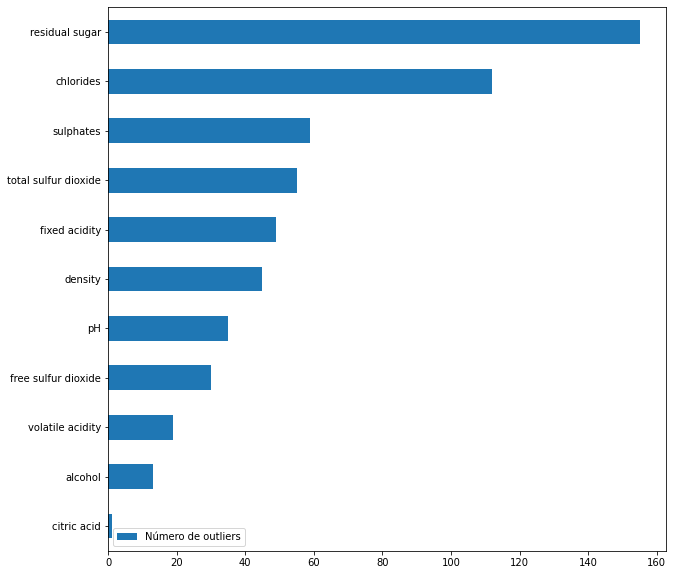

In [31]:
outliers_df\
    .transpose()\
    .rename({0: 'Número de outliers'}, axis = 1)\
    .sort_values(by = 'Número de outliers')\
    .plot(kind = 'barh', figsize = (10,10))

**Método do z-score**

<img src="https://miro.medium.com/max/24000/1*IdGgdrY_n_9_YfkaCh-dag.png" width=500>

<img src="https://miro.medium.com/max/24000/1*IZ2II2HYKeoMrdLU5jW6Dw.png" width=500>

Vamos fazer a transformação de z-score para cada coluna, e definir que temos outlires quando z > 3 ou z < -3.

In [32]:
def calc_z_score(df):
    return (df - df.mean())/df.std()

In [35]:
df_z = calc_z_score(df)
df_z.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528194          0.961576    -1.391037       -0.453077  -0.243630   
1      -0.298454          1.966827    -1.391037        0.043403   0.223805   
2      -0.298454          1.296660    -1.185699       -0.169374   0.096323   
3       1.654339         -1.384011     1.483689       -0.453077  -0.264878   
4      -0.528194          0.961576    -1.391037       -0.453077  -0.243630   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466047             -0.379014  0.558100  1.288240  -0.579025   
1             0.872365              0.624168  0.028252 -0.719708   0.128910   
2            -0.083643              0.228975  0.134222 -0.331073  -0.048074   
3             0.107558              0.411372  0.664069 -0.978798  -0.461036   
4            -0.466047             -0.379014  0.558100  1.288240  -0.579025   

    alcohol   quality  
0 -0.959946 -0.787576  
1 -0.584594 -0.787576  
2 -0.584594 -0.787576  
3 -0.584594  0.450707  
4 -0.959946 -0.787576

<AxesSubplot: ylabel='Frequency'>

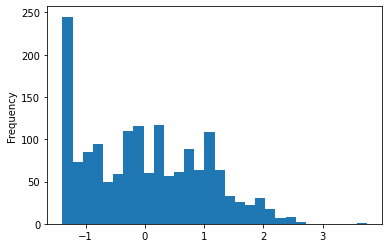

In [37]:
df_z['citric acid'].plot(kind = 'hist', bins = 30)

In [55]:
df_z.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528194          0.961576    -1.391037       -0.453077  -0.243630   
1      -0.298454          1.966827    -1.391037        0.043403   0.223805   
2      -0.298454          1.296660    -1.185699       -0.169374   0.096323   
3       1.654339         -1.384011     1.483689       -0.453077  -0.264878   
4      -0.528194          0.961576    -1.391037       -0.453077  -0.243630   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466047             -0.379014  0.558100  1.288240  -0.579025   
1             0.872365              0.624168  0.028252 -0.719708   0.128910   
2            -0.083643              0.228975  0.134222 -0.331073  -0.048074   
3             0.107558              0.411372  0.664069 -0.978798  -0.461036   
4            -0.466047             -0.379014  0.558100  1.288240  -0.579025   

    alcohol   quality  
0 -0.959946 -0.787576  
1 -0.584594 -0.787576  
2 -0.584594 -0.787576  
3 -0.584594  0.450707  
4 -0.959946 -0.787576

In [87]:
((df_z['fixed acidity'] < -3) | (df_z['fixed acidity'] > 3)).sum()

12

In [90]:
def get_outliers_from_z(df_z):
    n_outliers = {}
    
    for col in df_z.drop(columns = "quality"):
        n_col_outliers = (df_z[col] < -3) | (df_z[col] > 3) # outliers
        n_outliers[col] = n_col_outliers.sum()
    
    return n_outliers

In [91]:
n_outliers = get_outliers_from_z(df_z)
n_outliers

{'fixed acidity': 12,
 'volatile acidity': 10,
 'citric acid': 1,
 'residual sugar': 30,
 'chlorides': 31,
 'free sulfur dioxide': 22,
 'total sulfur dioxide': 15,
 'density': 18,
 'pH': 8,
 'sulphates': 27,
 'alcohol': 8}

In [93]:
df_z[(df_z > 3) | (df_z < -3)].any()

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool

In [95]:
feature = 'citric acid'
df_z[feature][(df_z[feature] > 3) | (df_z[feature] < -3)]

151    3.742403
Name: citric acid, dtype: float64

In [39]:
outliers_df = get_outliers_from_z(df_z)
outliers_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               NaN               NaN          NaN             NaN        NaN   
1               NaN               NaN          NaN             NaN        NaN   
2               NaN               NaN          NaN             NaN        NaN   
3               NaN               NaN          NaN             NaN        NaN   
4               NaN               NaN          NaN             NaN        NaN   
...             ...               ...          ...             ...        ...   
1594            NaN               NaN          NaN             NaN        NaN   
1595            NaN               NaN          NaN             NaN        NaN   
1596            NaN               NaN          NaN             NaN        NaN   
1597            NaN               NaN          NaN             NaN        NaN   
1598            NaN               NaN          NaN             NaN        NaN   

      free sulfur dioxide  total sulfur dioxide  density  pH  sulphates  \
0                     NaN                   NaN      NaN NaN        NaN   
1                     NaN                   NaN      NaN NaN        NaN   
2                     NaN                   NaN      NaN NaN        NaN   
3                     NaN                   NaN      NaN NaN        NaN   
4                     NaN                   NaN      NaN NaN        NaN   
...                   ...                   ...      ...  ..        ...   
1594                  NaN                   NaN      NaN NaN        NaN   
1595                  NaN                   NaN      NaN NaN        NaN   
1596                  NaN                   NaN      NaN NaN        NaN   
1597                  NaN                   NaN      NaN NaN        NaN   
1598                  NaN                   NaN      NaN NaN        NaN   

      alcohol  quality  
0         NaN      NaN  
1         NaN      NaN  
2         NaN      NaN  
3         NaN      NaN  
4         NaN      NaN  
...       ...      ...  
1594      NaN      NaN  
1595      NaN      NaN  
1596      NaN      NaN  
1597      NaN      NaN  
1598      NaN      NaN  

[1599 rows x 12 columns]

Há necessidade de removermos os outliers?

No geral, não necessariamente precisamos remover os outliers. Se formos eventualmente trabalhar com regressores ou modelos que sejam bastante sensíveis a outliers, talvez sua remoção seja, sim, interessante. No entanto, no nosso caso, se não temos uma boa justificativa para removê-los, não necessariamente precisamos fazê-lo. Podem simplesmente ser flutuações inerentes do tipo de dado.

___

## Como relacionamos isso tudo à qualidade do vinho?

Vamos, primeiramente, estudar mais a fundo a coluna "quality".

In [96]:
df["quality"].head(10)

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64

Algumas perguntas que podemos nos fazer a respeito da variável associada à percepção de qualidade do vinho incluem:
- esta variável é contínua ou discreta?
- como é a distribuição das notas?
- será que faria sentido "discretizar" a variável em apenas dois níveis categóricos? (ex: "bom" e "ruim")

<AxesSubplot: ylabel='Frequency'>

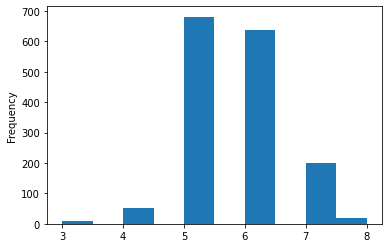

In [97]:
df["quality"].plot(kind = 'hist')

In [98]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Vemos que a maior parte das notas estão concentradas entre 5 e 6.

In [99]:
df['quality'].value_counts(normalize = True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

### Vamos relacionar esta variável às outras?

Sendo assim, poderíamos nos perguntar: **para cada nota, quais tendem a ser os valores de cada característica?**

**Intervalos de confiança**

Já mencionamos que temos uma série de medidas para as mesmas características. Podemos estimar um valor médio e uma medida de **incerteza** desta média, conhecida como **intervalo de confiança**. Assim, conseguimos ter uma ideia de dispersão dos valores e do grau de certeza com o qual conseguimos afirmar que o valor médio da nossa distribuição de valores de cada característica se encontra em um determinado intervalo.

<img src="https://static.significados.com.br/foto/intervaloconfiancaok.jpg" width = 400 />

Vamos avaliar, então, a média de cada característica, e o respectivo intervalo de confiança, para cada nota do conjunto de dados.

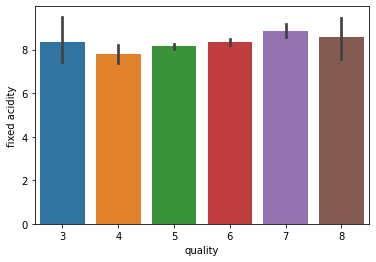

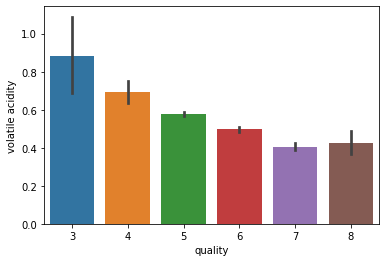

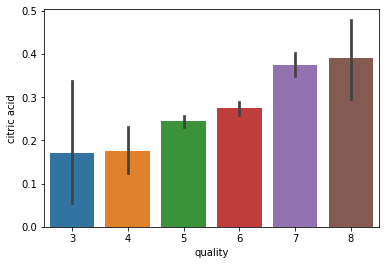

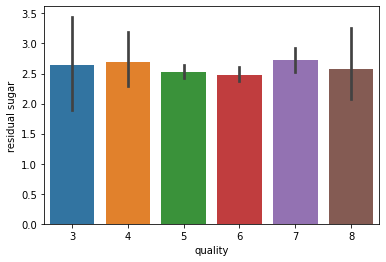

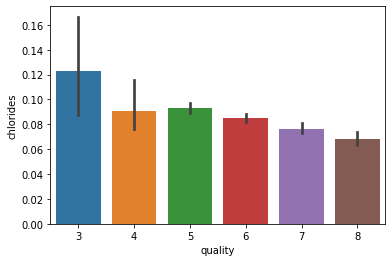

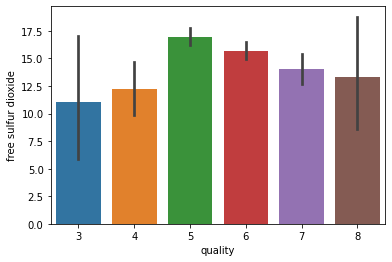

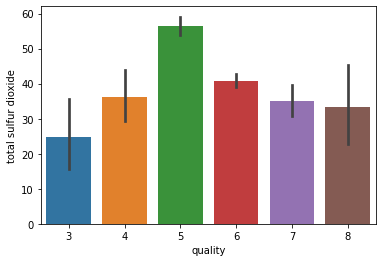

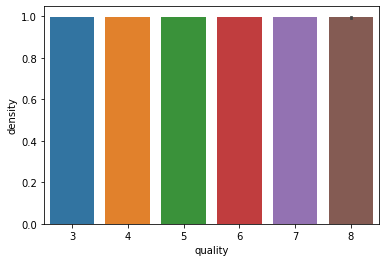

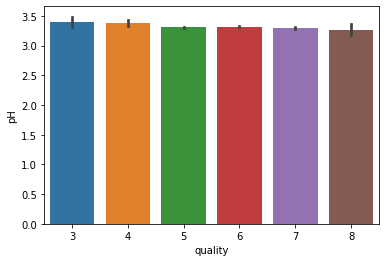

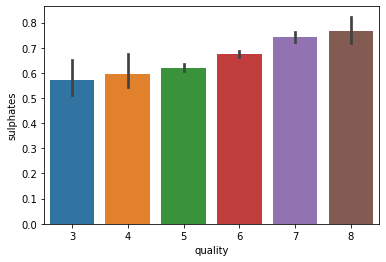

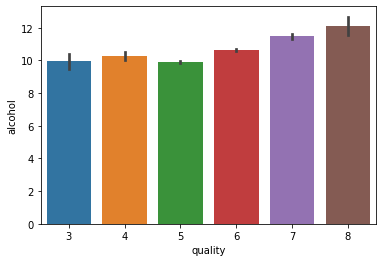

In [100]:
for col in df.drop(columns = "quality"):
    sns.barplot(data = df,
               x = "quality",
               y = col)
    plt.show()

Conseguimos reforçar, com essas visualizações, os mesmos pontos levantados nos gráficos de correlação.

Até aqui, já conseguimos identificar as características que mais **tendem** a influenciar na avaliação da qualidade do vinho. E se quisermos simplificar um pouco o problema, definindo uma nota mínima que entendemos ser suficiente para caracterizar o vinho como "bom", e, então, concluir acerca das características que mais impactam nesse sentido? Será que teremos os mesmos resultados?

<AxesSubplot: xlabel='quality', ylabel='chlorides'>

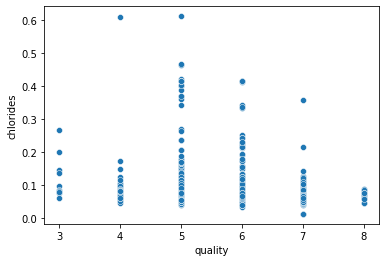

In [7]:
import seaborn as sns
sns.scatterplot(data = df,
               x = 'quality',
               y = 'chlorides')

**Covariância e correlação**

Até aqui, estudamos algumas medidas de tendência central e dispersão, como média, moda, mediana, desvio-padrão e variância. Nesta aula, começamos a aprofundar e entender como utilizar estas medidas para inferir **relações entre duas variáveis**.

**Covariância**
Medida estatística que mensura a **variabilidade conjunta** de duas variáveis aleatórias. Intuitivamente, podemos pensar na covariância como a tendência de valores superiores de uma variável estarem, também, associados a valores maiores da outra; e vice-versa.

*Definição matemática da covariância*
$cov(X,Y) = \sum_{i=1}^{n} \frac{(x_{i} - \mu_{x})(y_{i} - \mu_{y})}{n-1}$

<img src="https://dpbnri2zg3lc2.cloudfront.net/en/wp-content/uploads/2021/05/positive_negative_weak_covariance.jpg" alt="Alternative text" />

**Correlação**
Medida estatística de dependência entre duas variáveis. Pode ser vista sob alguns tipos de metodologias.

É muito comum encontrar a ideia de correlação associada à *correlação de Pearson*, que expressa a **dependência linear** entre duas variáveis a partir de suas **covariâncias**.

Cálculo da correlação de Pearson:

$\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}}$.

<img src="https://www.scribbr.de/wp-content/uploads/2021/08/01-correlation-types-1024x415.png" alt="Alternative text" />

A correlação de Pearson **normaliza** as covariâncias no intervalo [0,1].

Vale ressaltar que *existem outras métricas de correlação*. A correlação de Spearman, por exemplo, pode capturar relações de monotonia **não-lineares** entre duas variáveis.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Spearman_fig1.svg/1200px-Spearman_fig1.svg.png" width = 400 />

Vale lembrar que [correlação não implica causa!](https://tylervigen.com/spurious-correlations)

Podemos computar diretamente a correlação entre todas as colunas do nosso dataframe diretamente com o pandas.

Mas vamos nos aprofundar um pouco no assunto?

É importante entendermos se nossas distribuições, das características do dataset, são normais.

#### Testes de normalidade

Vamos ver alguns **teste estatísticos** que são utilizados para determinar se uma amostra segue uma distribuição normal ou não.

Os testes que faremos vão retornar dois resultados:

- **Estatística de teste**: uma quantidade numérica calculada pelo teste utilizando os dados da amostra;
- **p-value**: um valor de probabilidade que é utilizado para interpretar o resultado do teste.

O teste irá **assumir que a amostra analisada foi construída a partir de uma distribuição normal**. 

Essa é a **HIPÓTESE NULA ($H_0$) do teste**.

O que o p-value nos dá é **a probabilidade de termos encontrado o valor da estatística de teste assumindo a hipótese nula**.

Ou seja, se a amostra de fato for normal, qual é a probabilidade de termos encontrado o valor da estatística de teste?

Se essa probabilidade for **muito baixa**, quer dizer que **seria extremamente improvável que encontrássemos aquele valor pra estatística de teste se de fato a amostra fosse normal**, e, portanto, dizemos que os dados **nos dão evidência suficiente para rejeitar a hipótese nula: ou seja, a amostra NÃO é normal.**

Se, por outro lado, o p-value for alto, isso quer dizer que **falhamos em rejeitar a hipótese nula** -- não podemos dizer que a a amostra *não* é normal. Isso não quer dizer que a hipótese nula é verdadeira -- mas não temos evidências a favor de sua rejeição.

Em geral, o p-value ser "pequeno" ou "grande" se dá em termos de um **nível de significância** $\alpha$, que normalmente é tomado como  $\alpha = 5\%$. 

Assim, a forma simples de interpretar os resultados do teste, é:

- $ p \leq \alpha \ ( p \leq 0.05) \ $: rejeitamos a $H_0$: distribuição amostral não é normal;

- $ p > \alpha \ ( p > 0.05) \ $: falhamos em rejeitar a $H_0$: distribuição amostral parece ser normal;

Se você quiser saber mais sobre testes de normalidade, [clique aqui!](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/), ou [aqui](https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411)

Vamos conhecer alguns testes! 

______

__D’Agostino’s K^2 Test__

O teste K^2 de D’Agostino’s é baseado nas estatísticas descritivas **kurtosis** e **skewness**:

- **Skewness** é uma medida de **assimetria** da distribuição, isto é, o quanto ela é deslocada para a esquerda ou direita.
    - **A distribuição normal tem skewness igual a 0**

- **Kurtosis** quantifica a porção dos dados na **cauda** da distribuição -- ou seja, valores mais extremos.
    - **A distribuição normal tem kurtosis igual a 3**

<img src="https://i.pinimg.com/originals/0f/c7/66/0fc7666e8c1ab2822ad7a8e4fb534b88.gif" width=500>

Para detalhes como o teste funciona, [clique aqui](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test)

A função `normaltest()` do scipy aplica o teste a determinado conjunto de dados. A função retorna ambos a estatística de teste e o respectivo p-value.

In [9]:
# importar o teste
from scipy.stats import normaltest
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Rejeitamos H0: distribuição não parece ser normal!


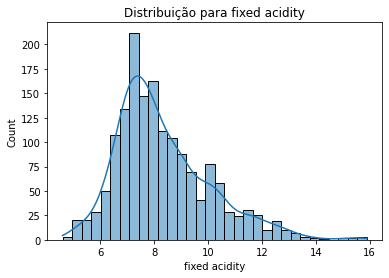

Rejeitamos H0: distribuição não parece ser normal!


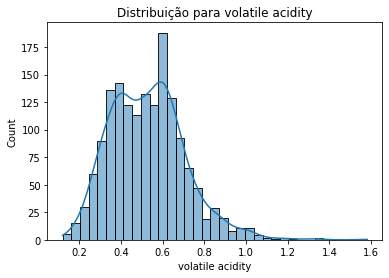

Rejeitamos H0: distribuição não parece ser normal!


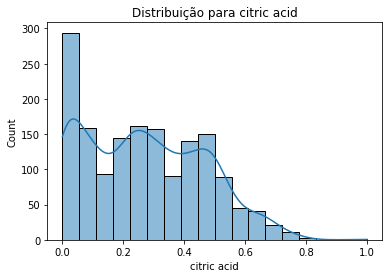

Rejeitamos H0: distribuição não parece ser normal!


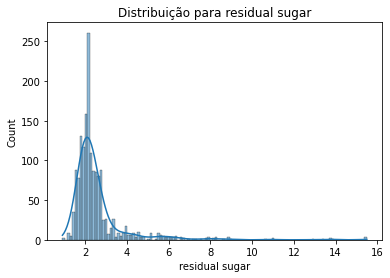

Rejeitamos H0: distribuição não parece ser normal!


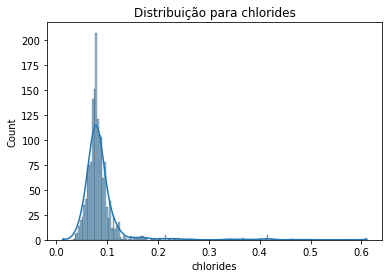

Rejeitamos H0: distribuição não parece ser normal!


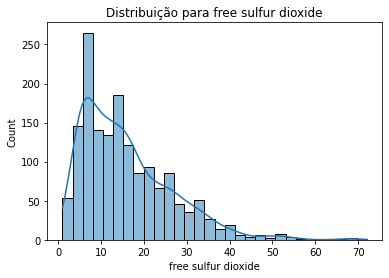

Rejeitamos H0: distribuição não parece ser normal!


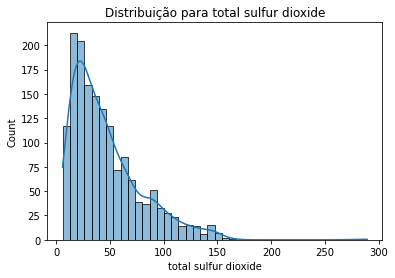

Rejeitamos H0: distribuição não parece ser normal!


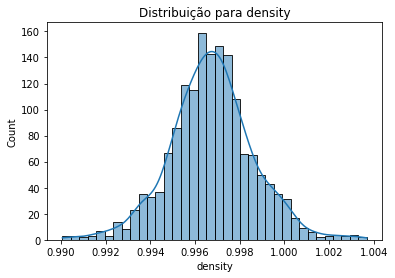

Rejeitamos H0: distribuição não parece ser normal!


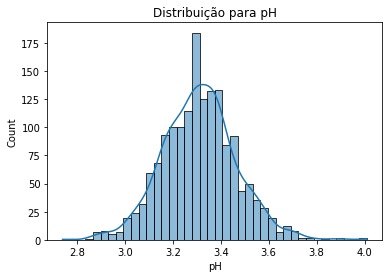

Rejeitamos H0: distribuição não parece ser normal!


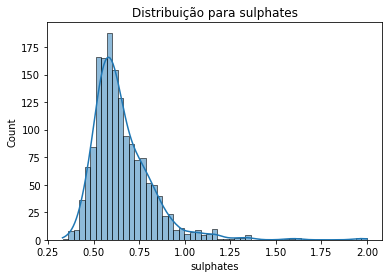

Rejeitamos H0: distribuição não parece ser normal!


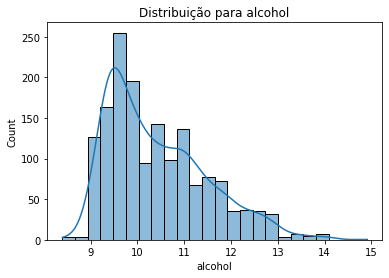

Rejeitamos H0: distribuição não parece ser normal!


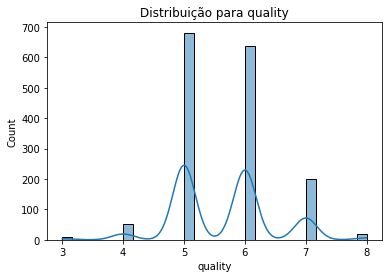

In [12]:
# Vamos verificar, para cada coluna do dataframe, se a nossa amostra advém de uma distribuição normal

for col in df.columns:
    test_stat, p = normaltest(df[col])
    
    if p < 0.05:
        print("Rejeitamos H0: distribuição não parece ser normal!")
    else:
        print("Não rejeitamos H0: distribuição parece ser normal.")
    
    sns.histplot(data = df,
                x = col,
                kde = True)
    plt.title(f"Distribuição para {col}")
    plt.show()

___

__Shapiro-Wilk Test__

O teste de Shapiro-Wilk é um dos testes de normalidade mais comuns e confiáveis, embora haja algumas sugestões de que o teste funcione melhor para amostras pequenas (algumas milhares de observações ou menos).

Para detalhes como o teste funciona, [clique aqui](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)

A função `shapiro()` do scipy aplica o teste a determinado conjunto de dados. A função retorna ambos a estatística de teste (W) e o respectivo p-value.

Vamos repetir o que fizemos acima:

In [13]:
# importar o teste
from scipy.stats import shapiro

Rejeitamos H0: distribuição não parece ser normal!


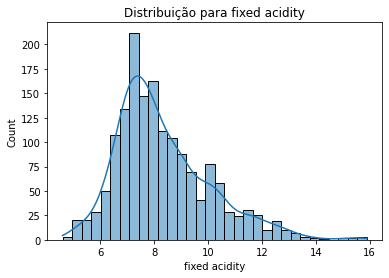

Rejeitamos H0: distribuição não parece ser normal!


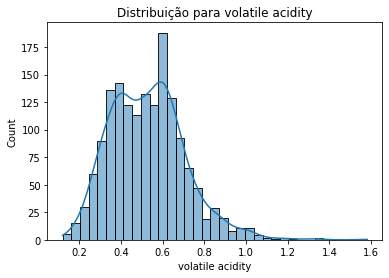

Rejeitamos H0: distribuição não parece ser normal!


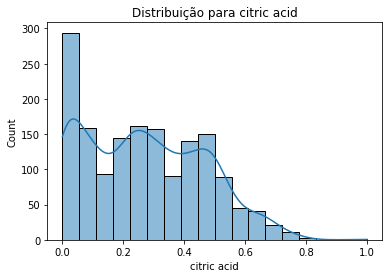

Rejeitamos H0: distribuição não parece ser normal!


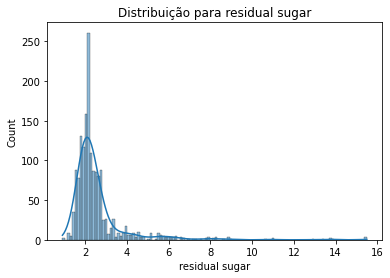

Rejeitamos H0: distribuição não parece ser normal!


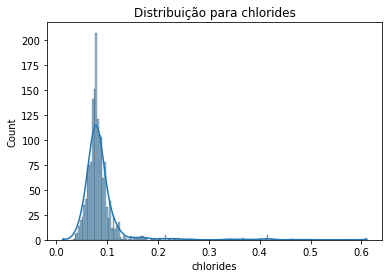

Rejeitamos H0: distribuição não parece ser normal!


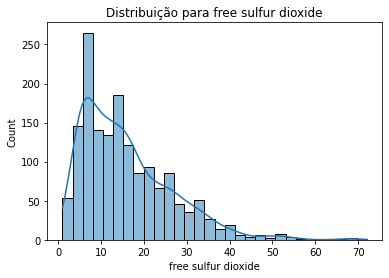

Rejeitamos H0: distribuição não parece ser normal!


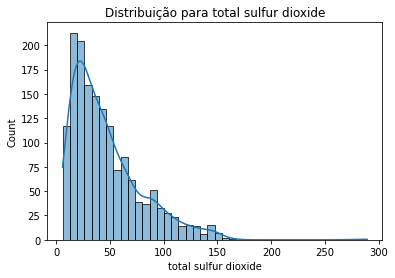

Rejeitamos H0: distribuição não parece ser normal!


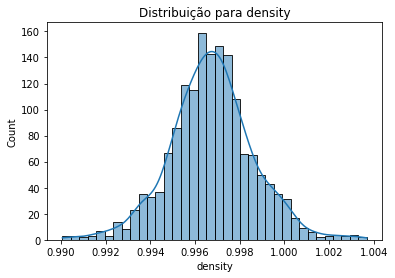

Rejeitamos H0: distribuição não parece ser normal!


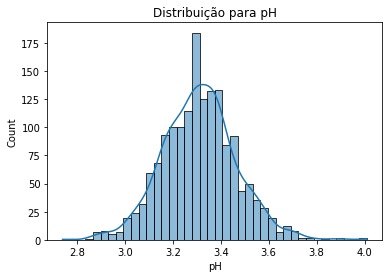

Rejeitamos H0: distribuição não parece ser normal!


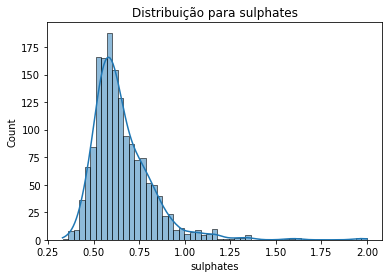

Rejeitamos H0: distribuição não parece ser normal!


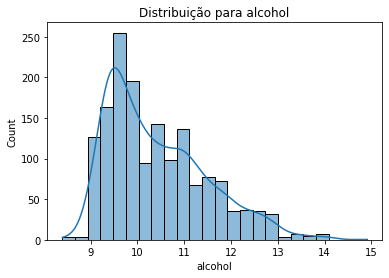

Rejeitamos H0: distribuição não parece ser normal!


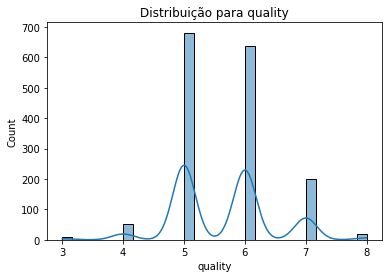

In [14]:
# Vamos verificar, para cada coluna do dataframe, se a nossa amostra advém de uma distribuição normal

for col in df.columns:
    test_stat, p = shapiro(df[col])
    
    if p < 0.05:
        print("Rejeitamos H0: distribuição não parece ser normal!")
    else:
        print("Não rejeitamos H0: distribuição parece ser normal.")
    
    sns.histplot(data = df,
                x = col,
                kde = True)
    plt.title(f"Distribuição para {col}")
    plt.show()

**Conclusão:** as colunas do nosso conjunto de dados parecem **não seguir** uma distribuição normal.

Dados os testes acima de normalidade, vamos optar por utilizar as **correlações de Spearman**, em vez de **Pearson** (a correlação de Pearson assume normalidade nas variáveis!). Podemos calculá-las diretamente com o pandas, ou, até mesmo, utilizando as funções do scipy.

[R de Spearman com scipy](https://www.bing.com/search?q=scipy+spearman+r&cvid=79901a33c45c4d62b23af4c1f5417584&aqs=edge..69i57l2j69i59l2.1395j0j9&FORM=ANAB01&PC=U531)

In [15]:
from scipy.stats import spearmanr

In [30]:
R = np.zeros([12,12])
p = np.zeros([12,12])


for index1, column1 in enumerate(df.columns):
    for index2, column2 in enumerate(df.columns):
        R[index1, index2], p[index1, index2] = spearmanr(df[column1], df[column2])
        
        if p[index1, index2] > 0.05:
            print(f"Correlação não significativa detectada para: ({column1, column2}) com r = {R[index1, index2]}")
            R[index1, index2] = 0

Correlação não significativa detectada para: (('volatile acidity', 'residual sugar')) com r = 0.03238560260008179
Correlação não significativa detectada para: (('volatile acidity', 'free sulfur dioxide')) com r = 0.021162641389858777
Correlação não significativa detectada para: (('volatile acidity', 'density')) com r = 0.02501411553162568
Correlação não significativa detectada para: (('citric acid', 'total sulfur dioxide')) com r = 0.009399602361305333
Correlação não significativa detectada para: (('residual sugar', 'volatile acidity')) com r = 0.03238560260008179
Correlação não significativa detectada para: (('residual sugar', 'sulphates')) com r = 0.03833200020573463
Correlação não significativa detectada para: (('residual sugar', 'quality')) com r = 0.032048167529057335
Correlação não significativa detectada para: (('chlorides', 'free sulfur dioxide')) com r = 0.0008051686407192979
Correlação não significativa detectada para: (('chlorides', 'sulphates')) com r = 0.020825479176879692

In [31]:
np.round(R,2)

array([[ 1.  , -0.28,  0.66,  0.22,  0.25, -0.18, -0.09,  0.62, -0.71,
         0.21, -0.07,  0.11],
       [-0.28,  1.  , -0.61,  0.  ,  0.16,  0.  ,  0.09,  0.  ,  0.23,
        -0.33, -0.22, -0.38],
       [ 0.66, -0.61,  1.  ,  0.18,  0.11, -0.08,  0.  ,  0.35, -0.55,
         0.33,  0.1 ,  0.21],
       [ 0.22,  0.  ,  0.18,  1.  ,  0.21,  0.07,  0.15,  0.42, -0.09,
         0.  ,  0.12,  0.  ],
       [ 0.25,  0.16,  0.11,  0.21,  1.  ,  0.  ,  0.13,  0.41, -0.23,
         0.  , -0.28, -0.19],
       [-0.18,  0.  , -0.08,  0.07,  0.  ,  1.  ,  0.79,  0.  ,  0.12,
         0.  , -0.08, -0.06],
       [-0.09,  0.09,  0.  ,  0.15,  0.13,  0.79,  1.  ,  0.13,  0.  ,
         0.  , -0.26, -0.2 ],
       [ 0.62,  0.  ,  0.35,  0.42,  0.41,  0.  ,  0.13,  1.  , -0.31,
         0.16, -0.46, -0.18],
       [-0.71,  0.23, -0.55, -0.09, -0.23,  0.12,  0.  , -0.31,  1.  ,
        -0.08,  0.18,  0.  ],
       [ 0.21, -0.33,  0.33,  0.  ,  0.  ,  0.  ,  0.  ,  0.16, -0.08,
         1.  ,  0.21

In [32]:
p[p > 0.05]

array([0.19554593, 0.39773463, 0.3174915 , 0.70722846, 0.19554593,
       0.12548168, 0.20024535, 0.97433528, 0.40529729, 0.39773463,
       0.97433528, 0.09976317, 0.0667355 , 0.70722846, 0.69414499,
       0.98393909, 0.3174915 , 0.09976317, 0.69414499, 0.08084594,
       0.12548168, 0.40529729, 0.0667355 , 0.98393909, 0.20024535,
       0.08084594])

In [33]:
df.corr(method = 'spearman')

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.278282     0.661708   
volatile acidity          -0.278282          1.000000    -0.610259   
citric acid                0.661708         -0.610259     1.000000   
residual sugar             0.220701          0.032386     0.176417   
chlorides                  0.250904          0.158770     0.112577   
free sulfur dioxide       -0.175137          0.021163    -0.076452   
total sulfur dioxide      -0.088417          0.094110     0.009400   
density                    0.623071          0.025014     0.352285   
pH                        -0.706674          0.233572    -0.548026   
sulphates                  0.212654         -0.325584     0.331074   
alcohol                   -0.066576         -0.224932     0.096456   
quality                    0.114084         -0.380647     0.213481   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.220701   0.250904            -0.175137   
volatile acidity            0.032386   0.158770             0.021163   
citric acid                 0.176417   0.112577            -0.076452   
residual sugar              1.000000   0.212959             0.074618   
chlorides                   0.212959   1.000000             0.000805   
free sulfur dioxide         0.074618   0.000805             1.000000   
total sulfur dioxide        0.145375   0.130033             0.789698   
density                     0.422266   0.411390            -0.041178   
pH                         -0.089971  -0.234361             0.115679   
sulphates                   0.038332   0.020825             0.045862   
alcohol                     0.116548  -0.284504            -0.081367   
quality                     0.032048  -0.189922            -0.056901   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.088417  0.623071 -0.706674   0.212654   
volatile acidity                  0.094110  0.025014  0.233572  -0.325584   
citric acid                       0.009400  0.352285 -0.548026   0.331074   
residual sugar                    0.145375  0.422266 -0.089971   0.038332   
chlorides                         0.130033  0.411390 -0.234361   0.020825   
free sulfur dioxide               0.789698 -0.041178  0.115679   0.045862   
total sulfur dioxide              1.000000  0.129332 -0.009841  -0.000504   
density                           0.129332  1.000000 -0.312055   0.161478   
pH                               -0.009841 -0.312055  1.000000  -0.080306   
sulphates                        -0.000504  0.161478 -0.080306   1.000000   
alcohol                          -0.257806 -0.462445  0.179932   0.207330   
quality                          -0.196735 -0.177074 -0.043672   0.377060   

                       alcohol   quality  
fixed acidity        -0.066576  0.114084  
volatile acidity     -0.224932 -0.380647  
citric acid           0.096456  0.213481  
residual sugar        0.116548  0.032048  
chlorides            -0.284504 -0.189922  
free sulfur dioxide  -0.081367 -0.056901  
total sulfur dioxide -0.257806 -0.196735  
density              -0.462445 -0.177074  
pH                    0.179932 -0.043672  
sulphates             0.207330  0.377060  
alcohol               1.000000  0.478532  
quality               0.478532  1.000000

In [101]:
# Pearson por padrão
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [38]:
np.abs(df.corr() - df.corr(method = 'spearman'))

fixed acidity  volatile acidity  citric acid  \
fixed acidity              0.000000          0.022151     0.009995   
volatile acidity           0.022151          0.000000     0.057764   
citric acid                0.009995          0.057764     0.000000   
residual sugar             0.105924          0.030468     0.032840   
chlorides                  0.157199          0.097472     0.091246   
free sulfur dioxide        0.021342          0.031666     0.015473   
total sulfur dioxide       0.024764          0.017640     0.026133   
density                    0.044977          0.002988     0.012662   
pH                         0.023695          0.001366     0.006122   
sulphates                  0.029648          0.064597     0.018304   
alcohol                    0.004907          0.022644     0.013448   
quality                    0.009968          0.009911     0.012892   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.105924   0.157199             0.021342   
volatile acidity            0.030468   0.097472             0.031666   
citric acid                 0.032840   0.091246             0.015473   
residual sugar              0.000000   0.157350             0.112431   
chlorides                   0.157350   0.000000             0.004757   
free sulfur dioxide         0.112431   0.004757             0.000000   
total sulfur dioxide        0.057653   0.082633             0.122031   
density                     0.066982   0.210757             0.019232   
pH                          0.004319   0.030665             0.045302   
sulphates                   0.032805   0.350435             0.005795   
alcohol                     0.074473   0.063363             0.011959   
quality                     0.018317   0.061016             0.006245   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.024764  0.044977  0.023695   0.029648   
volatile acidity                  0.017640  0.002988  0.001366   0.064597   
citric acid                       0.026133  0.012662  0.006122   0.018304   
residual sugar                    0.057653  0.066982  0.004319   0.032805   
chlorides                         0.082633  0.210757  0.030665   0.350435   
free sulfur dioxide               0.122031  0.019232  0.045302   0.005795   
total sulfur dioxide              0.000000  0.058063  0.056653   0.043451   
density                           0.058063  0.000000  0.029644   0.012972   
pH                                0.056653  0.029644  0.000000   0.116342   
sulphates                         0.043451  0.012972  0.116342   0.000000   
alcohol                           0.052152  0.033735  0.025700   0.113735   
quality                           0.011635  0.002155  0.014059   0.125663   

                       alcohol   quality  
fixed acidity         0.004907  0.009968  
volatile acidity      0.022644  0.009911  
citric acid           0.013448  0.012892  
residual sugar        0.074473  0.018317  
chlorides             0.063363  0.061016  
free sulfur dioxide   0.011959  0.006245  
total sulfur dioxide  0.052152  0.011635  
density               0.033735  0.002155  
pH                    0.025700  0.014059  
sulphates             0.113735  0.125663  
alcohol               0.000000  0.002365  
quality               0.002365  0.000000

In [39]:
(np.abs(df.corr() - df.corr(method = 'spearman')))*100/np.abs(df.corr())

fixed acidity  volatile acidity  citric acid  \
fixed acidity              0.000000          8.648438     1.488011   
volatile acidity           8.648438          0.000000    10.455065   
citric acid                1.488011         10.455065     0.000000   
residual sugar            92.287126       1588.612919    22.872819   
chlorides                167.759039        159.014722    44.767492   
free sulfur dioxide       13.877226        301.475532    25.375403   
total sulfur dioxide      21.879943         23.068042    73.546855   
density                    6.732538         13.565113     3.469520   
pH                         3.469423          0.581336     1.129744   
sulphates                 16.200639         24.751185     5.852338   
alcohol                    7.957719         11.193766    12.235946   
quality                    8.035343          2.537722     5.694861   

                      residual sugar   chlorides  free sulfur dioxide  \
fixed acidity              92.287126  167.759039            13.877226   
volatile acidity         1588.612919  159.014722           301.475532   
citric acid                22.872819   44.767492            25.375403   
residual sugar              0.000000  282.954544            60.107851   
chlorides                 282.954544    0.000000            85.524140   
free sulfur dioxide        60.107851   85.524140             0.000000   
total sulfur dioxide       28.396505  174.329235            18.277304   
density                    18.853258  105.046567            87.633267   
pH                          5.041926   11.570503            64.369550   
sulphates                 593.525578   94.390602            11.218533   
alcohol                   176.998028   28.652999            17.229846   
quality                   133.389265   47.333336            12.327427   

                      total sulfur dioxide     density         pH   sulphates  \
fixed acidity                    21.879943    6.732538   3.469423   16.200639   
volatile acidity                 23.068042   13.565113   0.581336   24.751185   
citric acid                      73.546855    3.469520   1.129744    5.852338   
residual sugar                   28.396505   18.853258   5.041926  593.525578   
chlorides                       174.329235  105.046567  11.570503   94.390602   
free sulfur dioxide              18.277304   87.633267  64.369550   11.218533   
total sulfur dioxide              0.000000   81.469135  85.199634  101.173123   
density                          81.469135    0.000000   8.675538    8.734857   
pH                               85.199634    8.675538   0.000000   59.162463   
sulphates                       101.173123    8.734857  59.162463    0.000000   
alcohol                          25.359145    6.798986  12.498064  121.518357   
quality                           6.285666    1.231905  24.353226   49.985911   

                         alcohol     quality  
fixed acidity           7.957719    8.035343  
volatile acidity       11.193766    2.537722  
citric acid            12.235946    5.694861  
residual sugar        176.998028  133.389265  
chlorides              28.652999   47.333336  
free sulfur dioxide    17.229846   12.327427  
total sulfur dioxide   25.359145    6.285666  
density                 6.798986    1.231905  
pH                     12.498064   24.353226  
sulphates             121.518357   49.985911  
alcohol                 0.000000    0.496752  
quality                 0.496752    0.000000

Podemos, ainda, deixar o resultado em uma forma um pouco mais "apresentável" utilizando uma visualização gráfica, também com **seaborn**, por exemplo.

<AxesSubplot: >

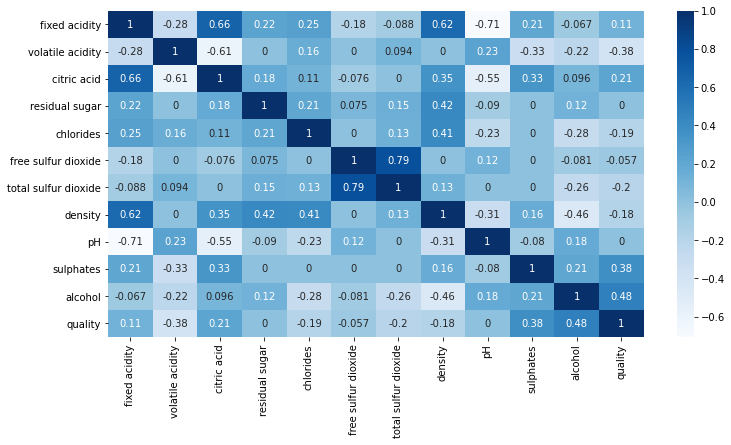

In [41]:
plt.figure(figsize = (12,6))

sns.heatmap(R,
           annot = True,
           cmap = 'Blues',
           xticklabels = df.columns,
           yticklabels = df.columns)

<AxesSubplot: >

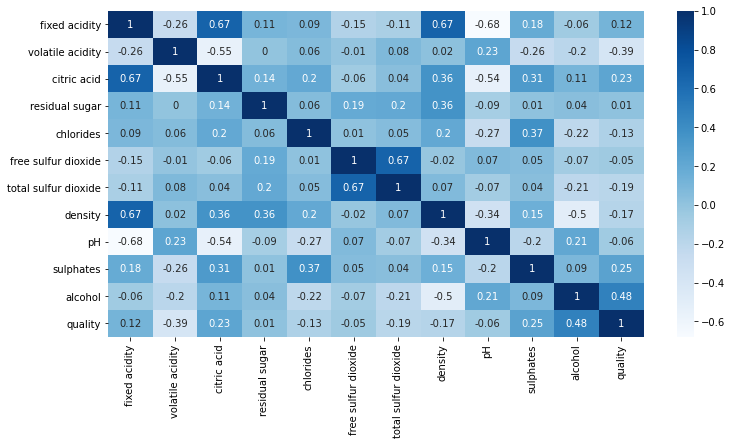

In [104]:
plt.figure(figsize = (12,6))

sns.heatmap(round(df.corr(),2),
           annot = True,
           cmap = 'Blues')

Vemos que algumas variáveis estão mais correlacionadas entre si, por exemplo, "density" e "fixed acidity", do que outras. Podemos, ainda, enfocar especificamente as correlações com nossa coluna "quality".

<AxesSubplot: >

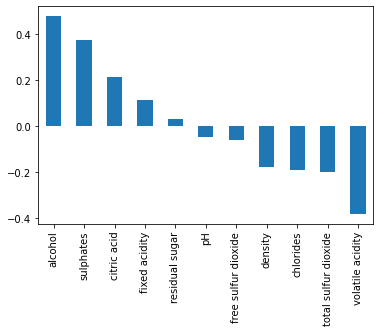

In [43]:
# Com spearman
df.corr(method = 'spearman')['quality'].drop("quality").sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot: >

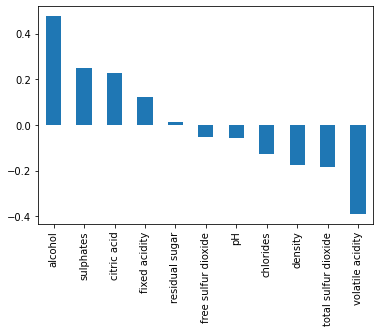

In [112]:
# Se usássemos Pearson
df.corr()['quality'].drop("quality").sort_values(ascending = False).plot(kind = 'bar')

Algumas tendências que poderíamos retirar a partir desse gráfico são:

- No geral, vinhos com maiores teores de álcool **tendem** a ter notas maiores
- Quanto maior a "volatilidade ácida", menores **tendem** a ser as notas (correlação negativa)
- Algumas características, como açúcar residual, parecem influenciar pouco na percepção da qualidade do vinho pelos consumidores

**Simplificando nosso problema para apenas dois níveis de qualidade: "bom" e "ruim"**

<AxesSubplot: ylabel='Frequency'>

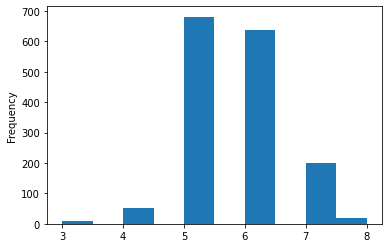

In [113]:
df['quality'].plot(kind = 'hist')

In [114]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Que critérios podemos adotar para o nosso ponto de corte para definirmos um bom vinho?


Distribuição de classes para corte = 3


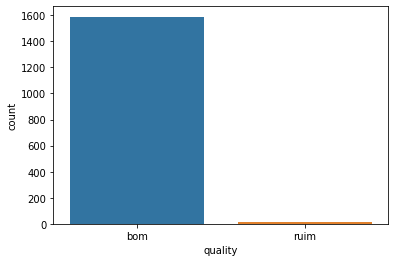


Distribuição de classes para corte = 4


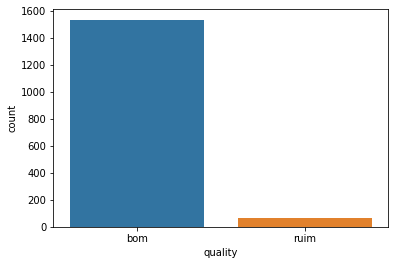


Distribuição de classes para corte = 5


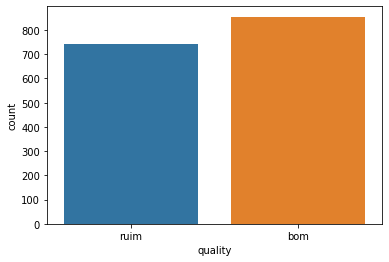


Distribuição de classes para corte = 6


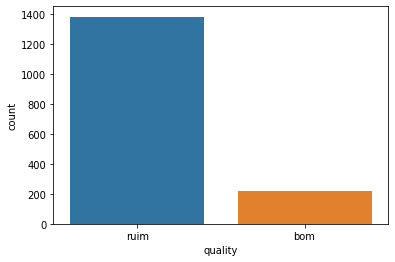


Distribuição de classes para corte = 7


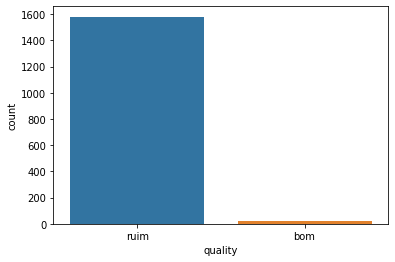


Distribuição de classes para corte = 8


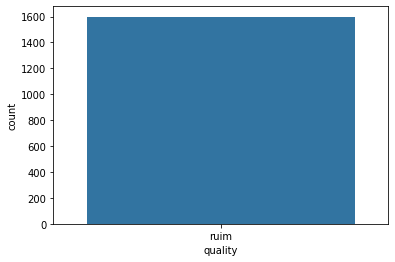

In [120]:
notas_possiveis = df['quality'].sort_values().unique()
notas_possiveis

for corte in notas_possiveis:
    print(f"\nDistribuição de classes para corte = {corte}")
    
    aux = df['quality'].apply(lambda x: "bom" if x > corte else "ruim")

    sns.countplot(x = aux)
    plt.show()

Vemos que, definindo um corte = 5, temos a situação em que as duas classes de dados (bom e ruim) estão mais equiparadas entre si. Adotemos, pois, o limiar de 5 para essa definição.

In [44]:
df['quality_v2'] = df['quality'].apply(lambda x: "bom" if x > 5 else "ruim")

In [45]:
df[['quality', 'quality_v2']]

quality quality_v2
0           5       ruim
1           5       ruim
2           5       ruim
3           6        bom
4           5       ruim
...       ...        ...
1594        5       ruim
1595        6        bom
1596        6        bom
1597        5       ruim
1598        6        bom

[1599 rows x 2 columns]

In [47]:
df['quality_v2'].value_counts(normalize = True)

bom     0.534709
ruim    0.465291
Name: quality_v2, dtype: float64

Com o **pairplot**, conseguimos visualizar as distribuições de cada variável do nosso conjunto de dados, e as relações, par a par, das características da base, além de segmentá-las de acordo com a qualidade do vinho ("bom" vs "ruim").

Será que conseguimos mapear as características com maior potencial para distinguir entre vinhos rotulados como "bons", e aqueles considerados "ruins" segundo nosso critério previamente definido?

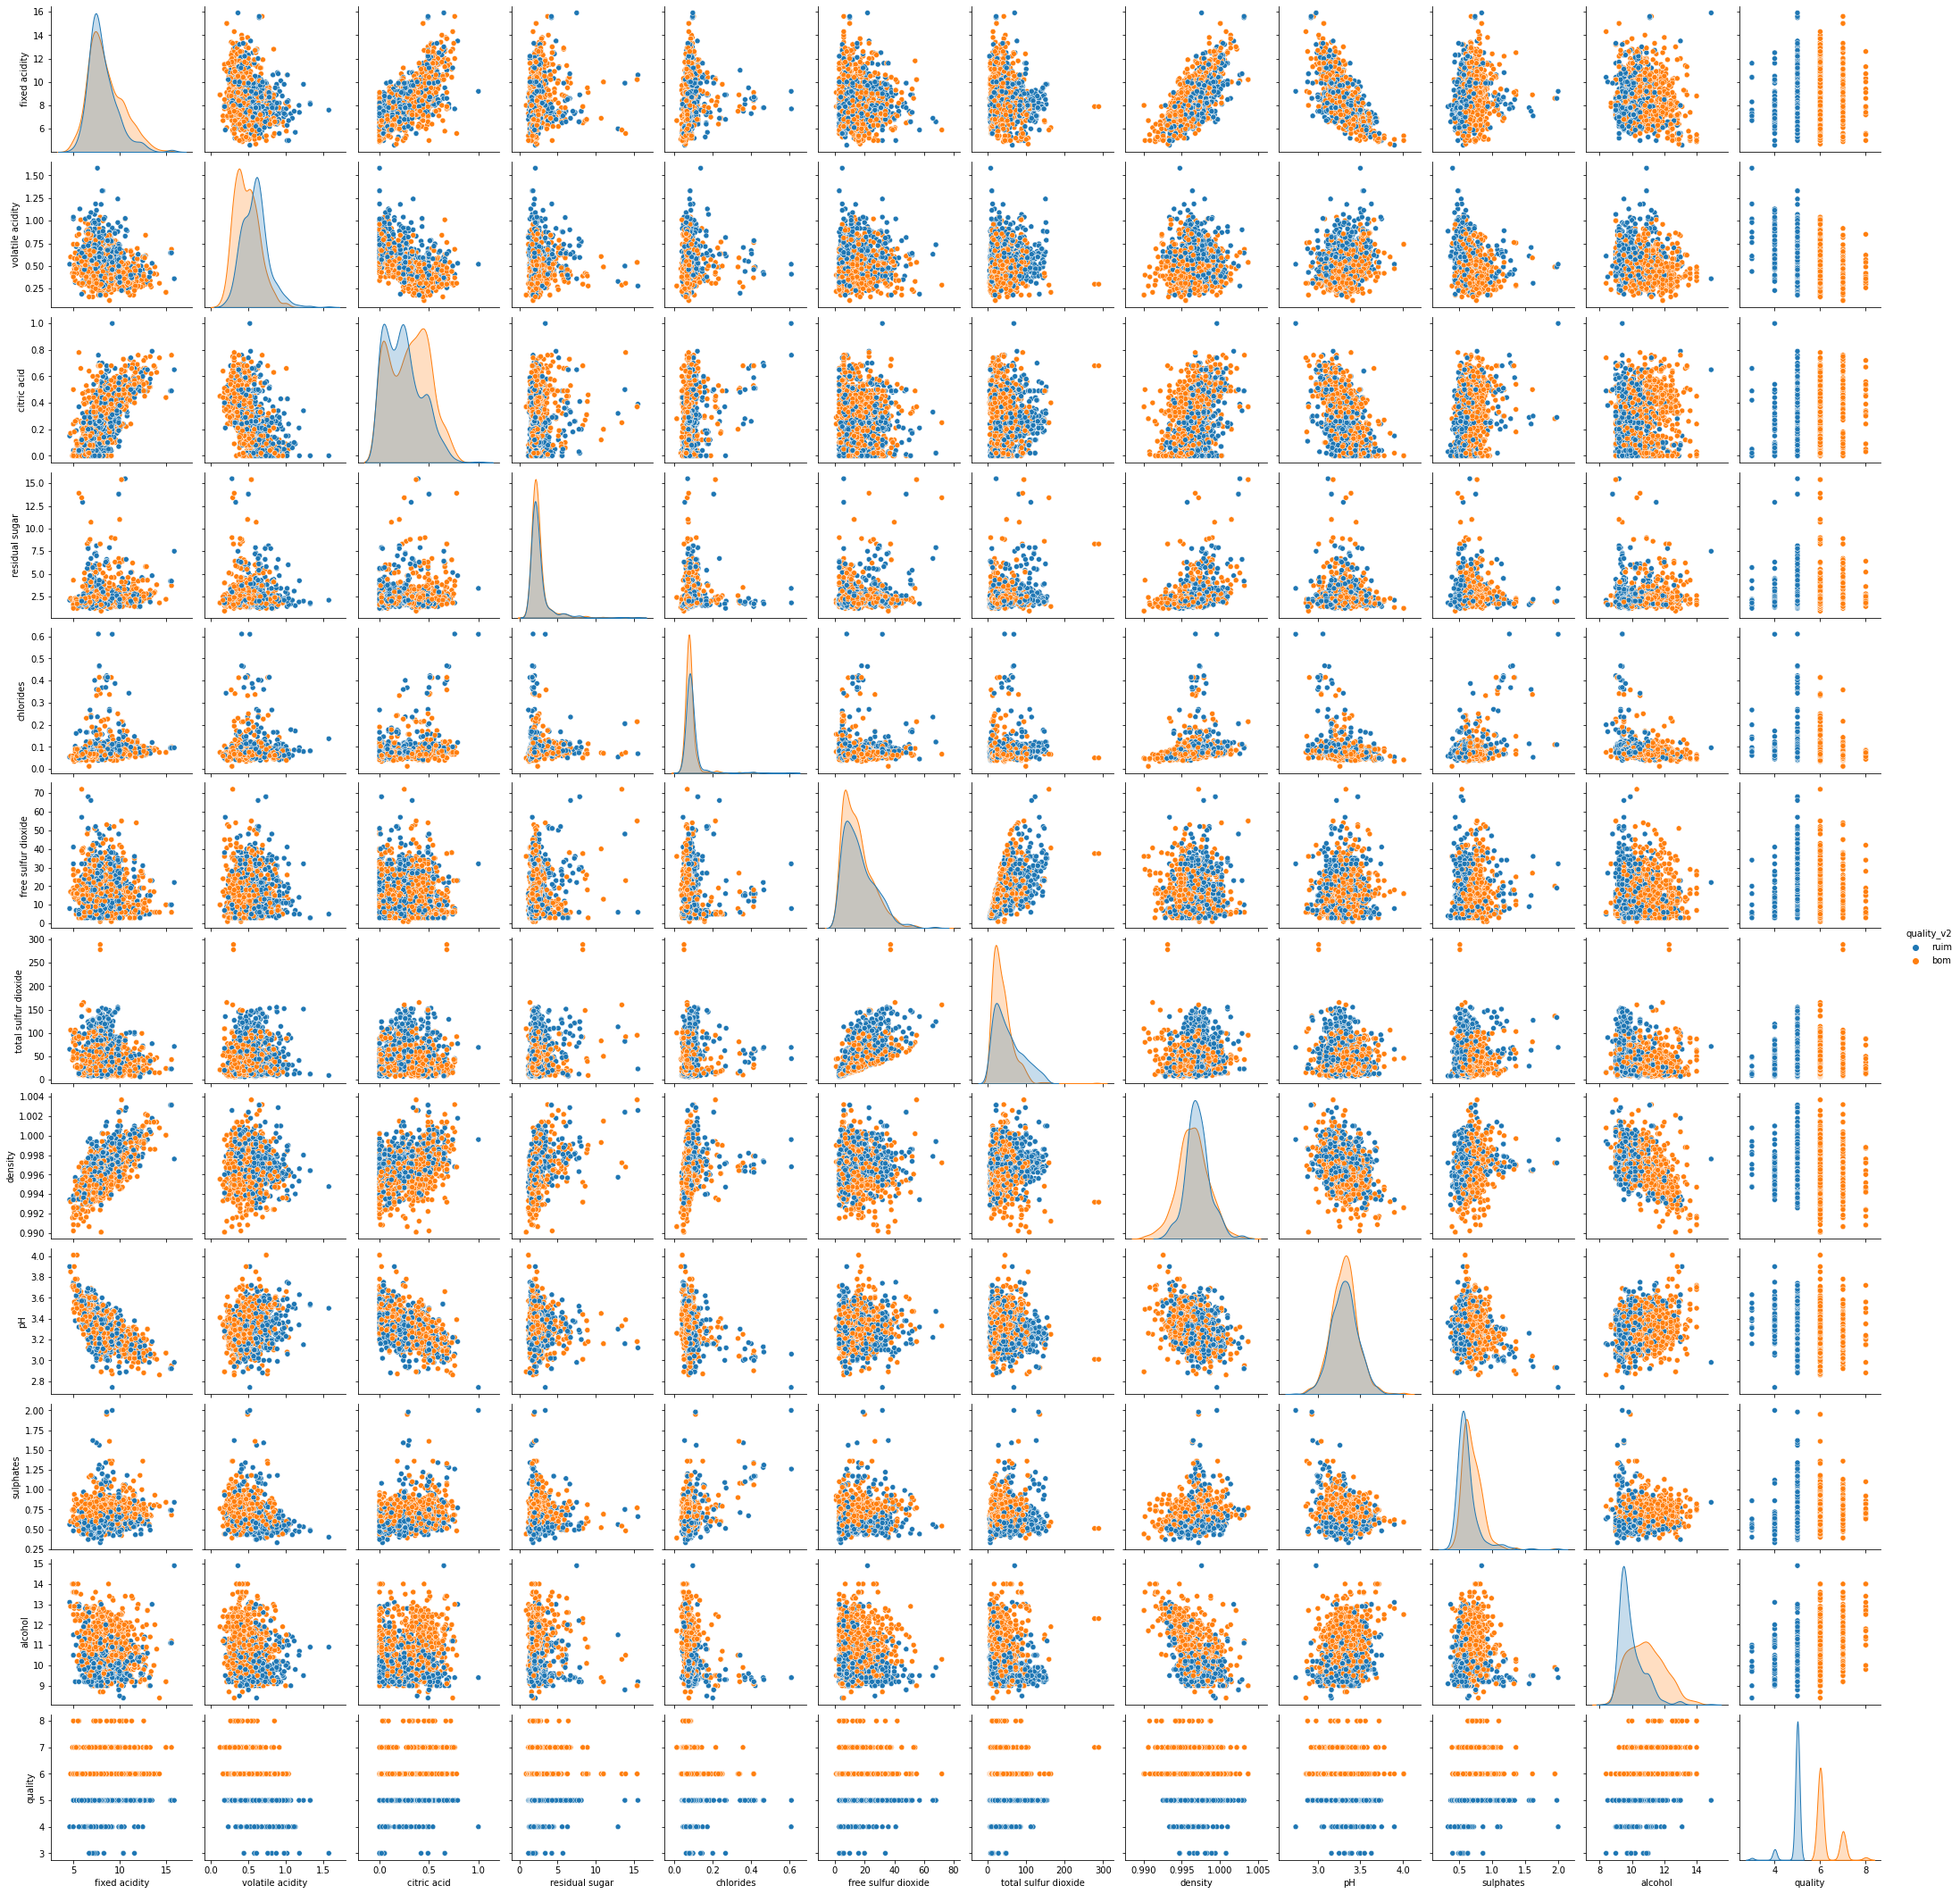

In [48]:
sns.pairplot(df, hue = "quality_v2")

In [49]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_v2'],
      dtype='object')

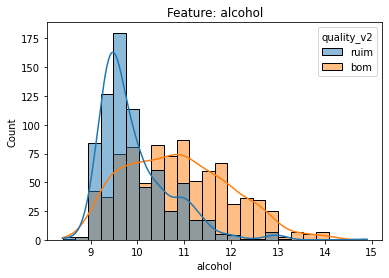

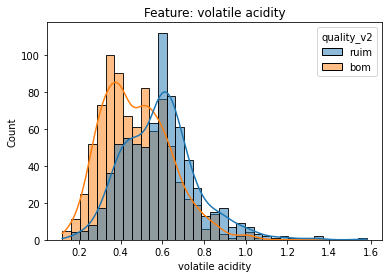

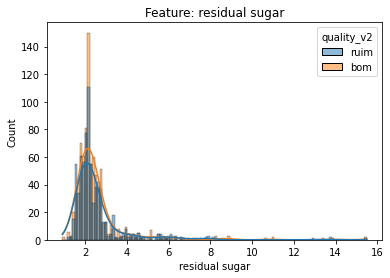

In [51]:
features = ['alcohol', 'volatile acidity', 'residual sugar']

for feature in features:
    sns.histplot(data = df,
                x = feature,
                kde = True,
                hue = 'quality_v2').set_title(f"Feature: {feature}")
    plt.show()

**Score de Fisher**

O score de Fisher é uma métrica que mensura a relação entre a **diferença das médias de duas classes de dados** e a **soma de suas variâncias**. Pode ser visto como uma espécie de "relação sinal-ruído" do poder de discriminação entre classes de cada característica avaliada.

Matematicamente, definimos o score de Fisher como:

$F = \frac{(\mu_{1} - \mu_{2})^2}{\sigma_{1}^2 + \sigma_{2}^2}$,

em que $\mu_{1}$ e $\mu_{2}$ indicam as médias das duas classes de dados em questão, e $\sigma_{1}$ e $\sigma_{2}$ representam os desvios-padrões.

In [52]:
def fisher_score(df1, df2):
    mu1 = df1.mean()
    mu2 = df2.mean()
    
    var1 = df1.var()
    var2 = df2.var()
    
    F = ((mu1 - mu2)**2)/(var1 + var2)
    
    return F

In [55]:
df1 = df[df['quality_v2'] == 'bom'].drop(columns = ['quality', 'quality_v2'])
df2 = df[df['quality_v2'] == 'ruim'].drop(columns = ['quality', 'quality_v2'])

In [56]:
F = fisher_score(df1, df2)

In [57]:
F

fixed acidity           0.018530
volatile acidity        0.229781
citric acid             0.052458
residual sugar          0.000009
chlorides               0.023708
free sulfur dioxide     0.007641
total sulfur dioxide    0.111843
density                 0.053046
pH                      0.000021
sulphates               0.099354
alcohol                 0.479523
dtype: float64

In [58]:
F.sort_values()

residual sugar          0.000009
pH                      0.000021
free sulfur dioxide     0.007641
fixed acidity           0.018530
chlorides               0.023708
citric acid             0.052458
density                 0.053046
sulphates               0.099354
total sulfur dioxide    0.111843
volatile acidity        0.229781
alcohol                 0.479523
dtype: float64

<AxesSubplot: >

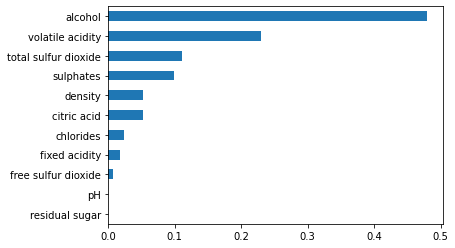

In [59]:
F.sort_values().plot(kind = 'barh')

<ipython-input-60-5424c9c477de>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'spearman')['quality'].drop("quality").sort_values(ascending = False).plot(kind = 'bar')


<AxesSubplot: >

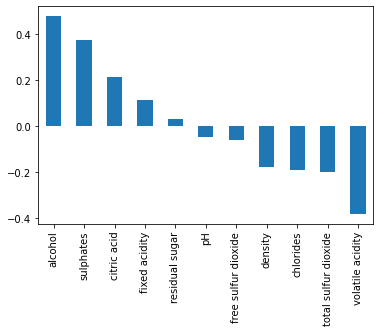

In [60]:
# Com spearman
df.corr(method = 'spearman')['quality'].drop("quality").sort_values(ascending = False).plot(kind = 'bar')

<ipython-input-69-282360c02b36>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'spearman')['quality'].drop("quality").sort_values(ascending = False).plot(kind = 'bar', title = 'Correlações de Spearman', ax = ax2)


<AxesSubplot: title={'center': 'Correlações de Spearman'}>

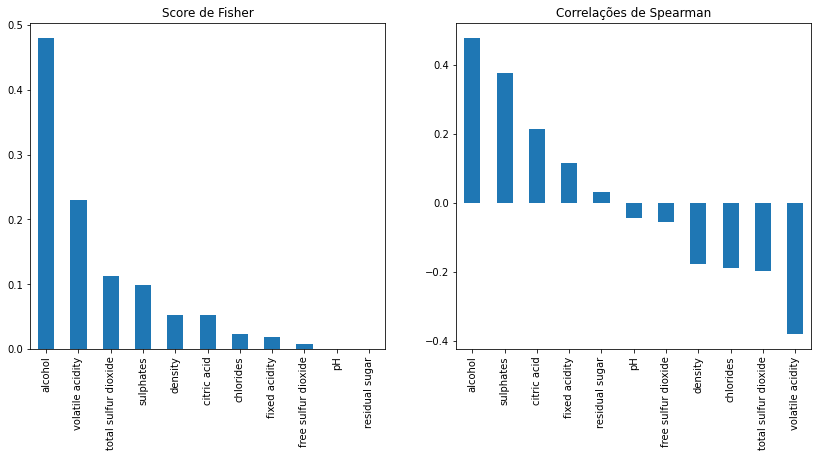

In [69]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
F.sort_values(ascending = False).plot(kind = 'bar', title = 'Score de Fisher', ax = ax1)
df.corr(method = 'spearman')['quality'].drop("quality").sort_values(ascending = False).plot(kind = 'bar', title = 'Correlações de Spearman', ax = ax2)


Vemos que a coluna "alcohol", em particular, apresenta o maior score, enquanto as colunas 'pH' e 'residual sugar' não aparentam ser tão promissoras para determinar a qualidade do vinho entre "boa" ou "ruim".

Para ilustrar, podemos plotar as distribuições dessas características, apenas.

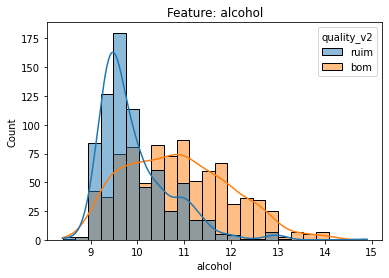

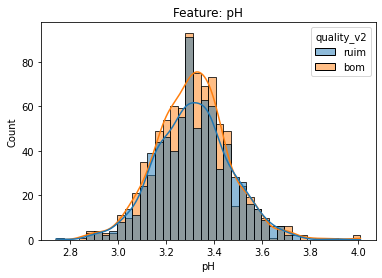

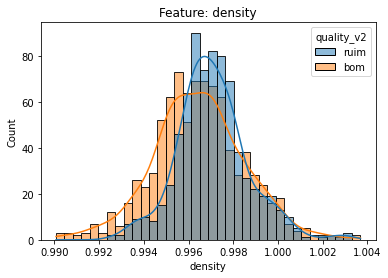

In [70]:
features = ['alcohol', 'pH', 'density']

for feature in features:
    sns.histplot(data = df,
                x = feature,
                kde = True,
                hue = 'quality_v2').set_title(f"Feature: {feature}")
    plt.show()

#### Como podemos nos certificar de que as distribuições são diferentes, realmente?

Com um **teste estatístico de hipótese**, podemos verificar se as duas distribuições que queremos comparar advêm, ou não, da mesma distribuição (em outras palavras, estamos investigando se, sob o critério do teste, as duas distribuições são diferentes).

Nesses casos, geralmente trabalhamos com um limiar de significância p < 0.05 (para dizer que as distribuições são diferentes).

**Hipótese nula (H0):** as amostras advém da mesma distribuição
**Hipótese alternativa (H1):** as amostras vêm de distribuições diferentes

In [71]:
from scipy.stats import ttest_ind

In [72]:
# Vamos testar, por exemplo, a coluna "alcohol"
col = "alcohol"
t, p = ttest_ind(df1[col].values, df2[col].values)

print(f"p-valor do teste-t: {p}")

p-valor do teste-t: 1.0239802386368774e-74


Como p < 0.05, podemos rejeitar a hipótese nula para o teor alcoólico do vinho.

Para o nível de confiança de 95 % (significância de 5 %), podemos dizer que as distribuições do teor alcoólico para os vinhos "bom" e "ruim" são estatisticamente diferentes.

In [73]:
# Vamos testar, por exemplo, a coluna "alcohol"
col = "pH"
t, p = ttest_ind(df1[col].values, df2[col].values)

print(f"p-valor do teste-t: {p}")

p-valor do teste-t: 0.8962366625632214


Como não podemos rejeitar a hipótese nula neste caso (p > 0.05), dizemos que as distribuições dos valores de pH **não são** diferentes.

___

## Conclusões gerais da nossa EDA

### Principais resultados gerais

Quando avaliamos correlações significantes ao nível de 5 %, observamos que:
- o teor alcoólico é a variável mais correlacionada positivamente às notas dos consumidores;
- a acidez volátil é a variável mais correlacionada negativamente (inversamente proporcional) às notas dos consumidores;
- variáveis como açúcar residual e pH parecem ter pouca influência nas notas.

O score de Fisher apontou que, de fato, o teor alcoólico é a variável com maior poder de discriminação entre bons vinhos e vinhos ruins (pensando nas distribuições estatísticas dos dados).

### Que sugestões podemos dar à empresa para produzir vinhos de boa qualidade?

Como principais destaques, podemos sugerir o monitoramento preciso do teor alcoólico dos vinhos, já que é a variável que mais impacta a percepção da qualidade da bebida pelos consumidores, bem como da acidez volátil.